In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statistics as stats
import os
import pandas as pd

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
file_url = 'https://raw.githubusercontent.com/luicamongi/Anexo_Magdalena/main/Anexo_nitratos_prom.csv'
df = pd.read_csv(file_url, delimiter=',', nrows=nRowsRead)
df.dataframeName = 'data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 168 rows and 12 columns


In [ ]:
df.head(5)

,Nombre punto de monitoreo,fecha de monitoreo,código de muestra,Oxígeno Disuelto mg O2/L,Temperatura °C,Conductividad Eléctrica uS/cm,Demanda Química de Oxígeno mg/L,pH unidades de pH,Sólidos Suspendidos Totales mg/L,Nitrógeno Total mg /L,Fósforo Total mg/L,Nitratos (mg N-NO3-/L)
0,RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...,30/03/2009,17398,6.1,22.0,128.0,31.0,7.84,680.0,1.00,0.930,0.240
1,RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...,4/06/2009,17629,7.2,21.4,102.0,58.0,7.76,1090.0,0.53,1.800,0.550
2,RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...,19/06/2009,17688,7.9,24.1,120.3,20.0,6.61,200.0,0.61,0.530,0.295
3,RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...,11/09/2009,17842,7.5,23.5,111.0,27.0,7.37,38.0,0.50,0.140,0.068
4,RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...,31/10/2009,18197,7.8,25.5,199.0,110.0,7.19,1380.0,3.50,0.076,0.250


In [ ]:
df.isna() .sum()

,0
Nombre punto de monitoreo,0
fecha de monitoreo,0
código de muestra,0
Oxígeno Disuelto mg O2/L,1
Temperatura °C,0
Conductividad Eléctrica uS/cm,2
Demanda Química de Oxígeno mg/L,6
pH unidades de pH,1
Sólidos Suspendidos Totales mg/L,7
Nitrógeno Total mg /L,3


In [ ]:
print (df)


                             Nombre punto de monitoreo fecha de monitoreo  \
0    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...         30/03/2009   
1    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...          4/06/2009   
2    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...         19/06/2009   
3    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...         11/09/2009   
4    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...         31/10/2009   
..                                                 ...                ...   
163   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         15/10/2022   
164   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         15/11/2022   
165   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         28/07/2023   
166   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         29/09/2023   
167   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         12/11/2023   

    código de muestra  Oxígeno Disuelto mg O2/L  Temperatura °C  \
0       

In [ ]:
columns_to_drop = [0, 1, 2, 3, 6, 8, 9, 10]
Z = df.drop(df.columns[columns_to_drop], axis=1)

In [ ]:
W = Z.dropna()
print (W)

     Temperatura °C  Conductividad Eléctrica uS/cm  pH unidades de pH  \
0              22.0                          128.0               7.84   
1              21.4                          102.0               7.76   
2              24.1                          120.3               6.61   
3              23.5                          111.0               7.37   
4              25.5                          199.0               7.19   
..              ...                            ...                ...   
163            19.4                          132.0               7.98   
164            25.4                          124.0               7.64   
165            24.1                          107.0               7.28   
166            26.3                          195.0               7.86   
167            25.2                          140.0               7.70   

     Nitratos (mg N-NO3-/L)  
0                     0.240  
1                     0.550  
2                     0.295  
3  

In [ ]:
W.isna() .sum()

,0
Temperatura °C,0
Conductividad Eléctrica uS/cm,0
pH unidades de pH,0
Nitratos (mg N-NO3-/L),0


In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import KNNImputer

Matriz de correlación:
                               Temperatura °C  Conductividad Eléctrica uS/cm  \
Temperatura °C                       1.000000                       0.121115   
Conductividad Eléctrica uS/cm        0.121115                       1.000000   
pH unidades de pH                   -0.013665                       0.052881   
Nitratos (mg N-NO3-/L)               0.232118                       0.057174   

                               pH unidades de pH  Nitratos (mg N-NO3-/L)  
Temperatura °C                         -0.013665                0.232118  
Conductividad Eléctrica uS/cm           0.052881                0.057174  
pH unidades de pH                       1.000000                0.072060  
Nitratos (mg N-NO3-/L)                  0.072060                1.000000  


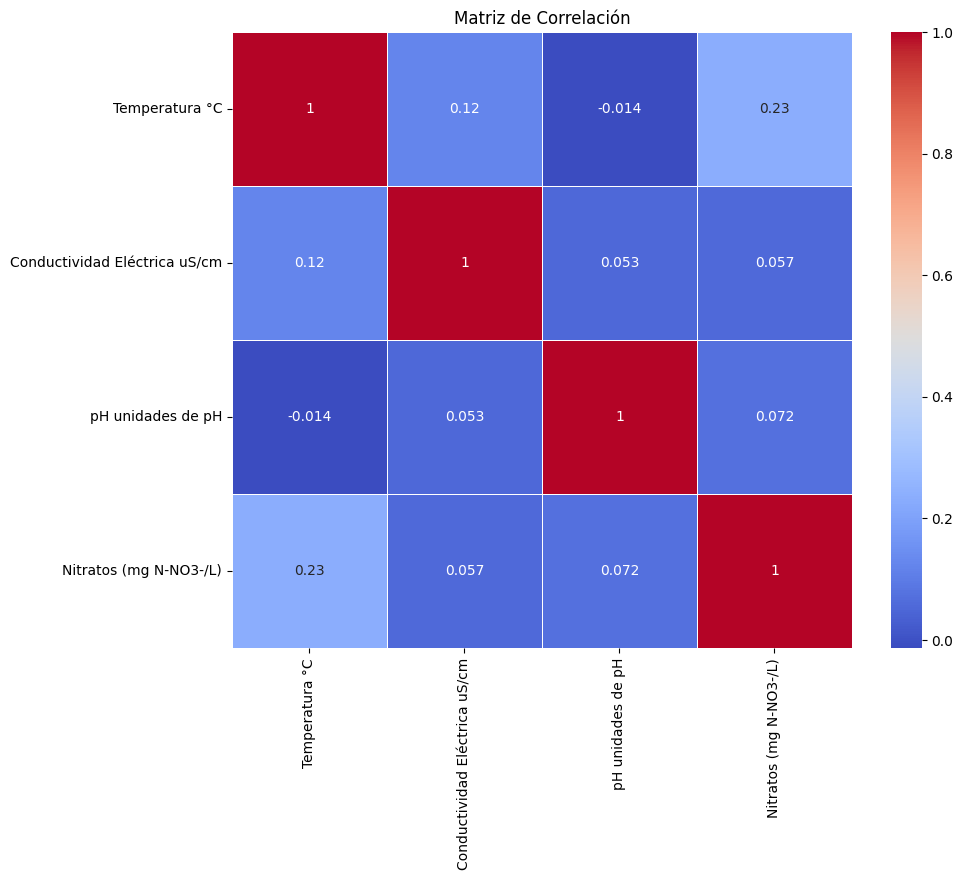

In [ ]:
# Calcular la matriz de correlación
corr_matrix = W.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_matrix)

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
W.describe()

,Temperatura °C,Conductividad Eléctrica uS/cm,pH unidades de pH,Nitratos (mg N-NO3-/L)
count,166.000000,166.000000,166.000000,166.000000
mean,23.606627,113.544578,7.446446,0.289167
std,2.639356,84.383908,0.540610,0.148307
min,15.700000,23.900000,4.110000,0.028000
25%,21.700000,90.605000,7.272500,0.172500
50%,24.100000,109.000000,7.565000,0.294000
75%,25.275000,123.000000,7.710000,0.348825
max,32.300000,1122.000000,9.030000,1.200000


In [ ]:
columns_to_drop_1 = [2, 3, 6, 8, 9, 10]
P = df.drop(df.columns[columns_to_drop_1], axis=1)
Q = P.dropna()
print (Q)

                             Nombre punto de monitoreo fecha de monitoreo  \
0    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...         30/03/2009   
1    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...          4/06/2009   
2    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...         19/06/2009   
3    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...         11/09/2009   
4    RCA_MAGDALENA_HUI_GIGANTE_PASO DEL COLEGIO [21...         31/10/2009   
..                                                 ...                ...   
163   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         15/10/2022   
164   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         15/11/2022   
165   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         28/07/2023   
166   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         29/09/2023   
167   RCA_MAGDALENA_TOL_NATAGAIMA_ANGOSTURA [21137050]         12/11/2023   

     Temperatura °C  Conductividad Eléctrica uS/cm  pH unidades de pH  \
0 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


<ipython-input-14-fbb3c01beaf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q['Nitratos (mg N-NO3-/L)'].fillna(mean_values, inplace=True)


Mejores hiperparámetros para Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest - Error cuadrático medio (MSE): 0.011600436430978717
Random Forest - Error Absoluto Medio (MAE): 0.0846491031419484
Random Forest - Coeficiente de determinación (R^2): -0.046114874049098864
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Gradient Boosting - Error cuadrático medio (MSE): 0.00954839002231415
Gradient Boosting - Error Absoluto Medio (MAE): 0.080612900928186
Gradient Boosting - Coeficiente de determinación (R^2): 0.13893646286529404
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros para XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
XGBoos

<ipython-input-14-fbb3c01beaf6>:137: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


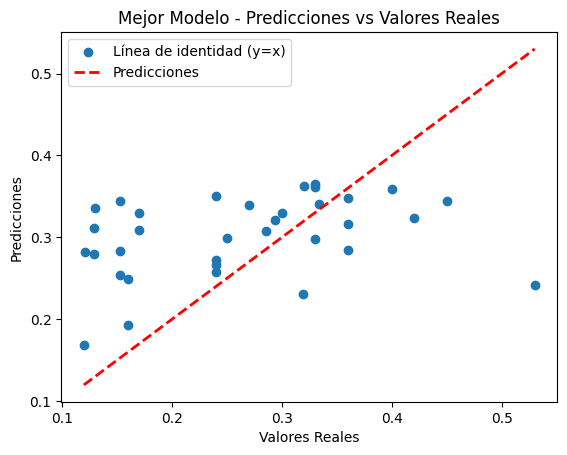

Puntajes R^2 de validación cruzada: [-2.09154612e-01 -2.57900626e+00  2.28249466e-03 -6.37871718e-02
 -1.29890139e-01]
Media de los puntajes R^2: -0.5959111380713953


In [ ]:
# Imputación de valores faltantes en Nitratos
mean_values = Q.groupby(['Nombre punto de monitoreo'])['Nitratos (mg N-NO3-/L)'].transform('mean')
Q['Nitratos (mg N-NO3-/L)'].fillna(mean_values, inplace=True)

if Q['Nitratos (mg N-NO3-/L)'].isna().sum() > 0:
    global_mean = Q['Nitratos (mg N-NO3-/L)'].mean()
    Q['Nitratos (mg N-NO3-/L)'].fillna(global_mean, inplace=True)

# Definir las características (X) y la etiqueta (y)
X = Q[['Temperatura °C', 'Conductividad Eléctrica uS/cm', 'pH unidades de pH']]
y = Q['Nitratos (mg N-NO3-/L)']

# Agregar características polinómicas
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir la cuadrícula de hiperparámetros para Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda en cuadrícula para Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Entrenar el modelo Random Forest
rf_grid_search.fit(X_train, y_train)

# Mejor conjunto de hiperparámetros para Random Forest
rf_best_params = rf_grid_search.best_params_
print("Mejores hiperparámetros para Random Forest:", rf_best_params)

# Evaluar el modelo Random Forest con los mejores hiperparámetros
rf_best_model = rf_grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE), el MAE y el coeficiente de determinación (R^2) para Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Imprimir los resultados para Random Forest
print("Random Forest - Error cuadrático medio (MSE):", rf_mse)
print("Random Forest - Error Absoluto Medio (MAE):", rf_mae)
print("Random Forest - Coeficiente de determinación (R^2):", rf_r2)

# Definir el modelo Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Definir la cuadrícula de hiperparámetros para Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda en cuadrícula para Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Entrenar el modelo Gradient Boosting
gb_grid_search.fit(X_train, y_train)

# Mejor conjunto de hiperparámetros para Gradient Boosting
gb_best_params = gb_grid_search.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", gb_best_params)

# Evaluar el modelo Gradient Boosting con los mejores hiperparámetros
gb_best_model = gb_grid_search.best_estimator_
gb_y_pred = gb_best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE), el MAE y el coeficiente de determinación (R^2) para Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Imprimir los resultados para Gradient Boosting
print("Gradient Boosting - Error cuadrático medio (MSE):", gb_mse)
print("Gradient Boosting - Error Absoluto Medio (MAE):", gb_mae)
print("Gradient Boosting - Coeficiente de determinación (R^2):", gb_r2)

# Definir el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir la cuadrícula de hiperparámetros para XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar la búsqueda en cuadrícula para XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Entrenar el modelo XGBoost
xgb_random_search.fit(X_train, y_train)

# Mejor conjunto de hiperparámetros para XGBoost
xgb_best_params = xgb_random_search.best_params_
print("Mejores hiperparámetros para XGBoost:", xgb_best_params)

# Evaluar el modelo XGBoost con los mejores hiperparámetros
xgb_best_model = xgb_random_search.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE), el MAE y el coeficiente de determinación (R^2) para XGBoost
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

# Imprimir los resultados para XGBoost
print("XGBoost - Error cuadrático medio (MSE):", xgb_mse)
print("XGBoost - Error Absoluto Medio (MAE):", xgb_mae)
print("XGBoost - Coeficiente de determinación (R^2):", xgb_r2)

# Graficar las predicciones vs los valores reales para el mejor modelo (puedes elegir el que tenga mejor desempeño)
best_model = rf_best_model  # Cambia esto según el mejor modelo

y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Mejor Modelo - Predicciones vs Valores Reales')
plt.legend(['Línea de identidad (y=x)', 'Predicciones'])
plt.show()

# Evaluar el mejor modelo usando validación cruzada
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='r2')
print("Puntajes R^2 de validación cruzada:", cv_scores)
print("Media de los puntajes R^2:", np.mean(cv_scores))

                                    Característica  Importancia
0                                   Temperatura °C     0.304861
5                 Temperatura °C pH unidades de pH     0.282790
4     Temperatura °C Conductividad Eléctrica uS/cm     0.175330
7  Conductividad Eléctrica uS/cm pH unidades de pH     0.150692
1                    Conductividad Eléctrica uS/cm     0.061088
2                                pH unidades de pH     0.025239
3                                 Temperatura °C^2     0.000000
6                  Conductividad Eléctrica uS/cm^2     0.000000
8                              pH unidades de pH^2     0.000000


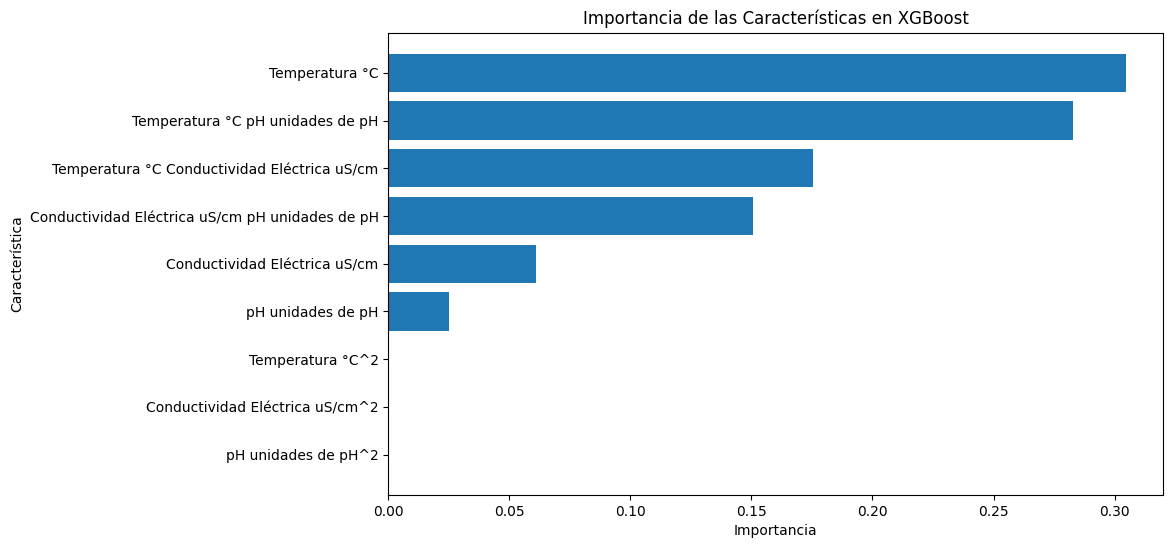

In [ ]:
# Obtener la importancia de las características del modelo XGBoost
feature_importances = xgb_best_model.feature_importances_

# Crear un DataFrame para organizar las importancias junto con el nombre de las características
features = poly.get_feature_names_out(input_features=X.columns)
feature_importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': feature_importances
})

# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Imprimir la importancia de las características
print(feature_importance_df)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Característica'], feature_importance_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características en XGBoost')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante aparezca arriba
plt.show()